In [49]:
import pandas as pd
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [51]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


/Users/poonamsarvaiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

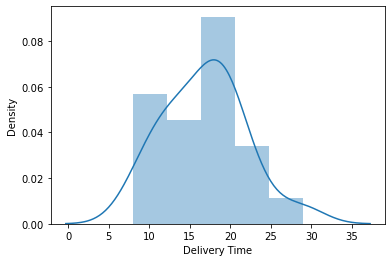

In [52]:
import seaborn as sns
sns.distplot(data['Delivery Time'])

/Users/poonamsarvaiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

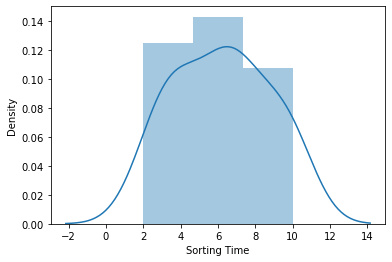

In [53]:
import seaborn as sns
sns.distplot(data['Sorting Time'])

In [54]:
data = data.rename({"Delivery Time":"delivery_time"},axis=1)
data.head()

,delivery_time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [55]:
data = data.rename({"Sorting Time":"sorting_time"},axis=1)
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [72]:
import statsmodels.formula.api as smf
model = smf.ols("sorting_time ~ delivery_time",data = data).fit()

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

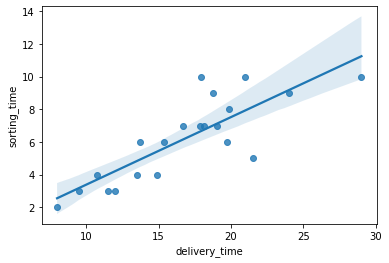

In [73]:
sns.regplot(x="delivery_time", y="sorting_time", data=data)

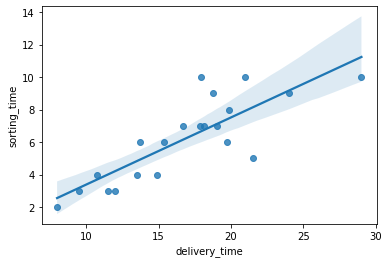

In [74]:
sns.regplot(x="delivery_time", y="sorting_time", data=data);

In [75]:
model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [76]:
print(model.tvalues, '\n', model.pvalues) 

Intercept       -0.667290
delivery_time    6.387447
dtype: float64 
 Intercept        0.512611
delivery_time    0.000004
dtype: float64


In [77]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [78]:
newdata=pd.Series([15,21])

In [81]:
data_pred=pd.DataFrame(newdata,columns=['delivery_time'])

In [82]:
model.predict(data_pred)

0    5.449481
1    7.931943
dtype: float64